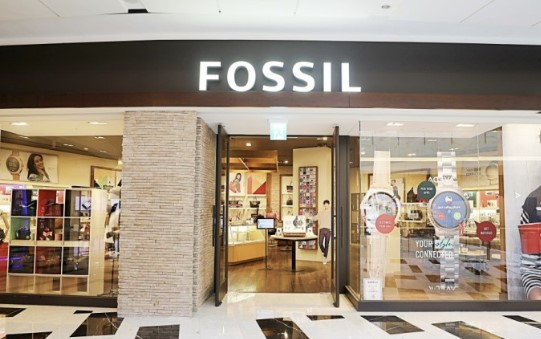

''

In [1]:
from PIL import Image
import pytesseract

image =  Image.open("storefront.jpg")
display(image)
pytesseract.image_to_string(image)

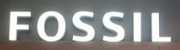

'FOSSIL\n'

In [2]:
# Set the bounding box
# boundary by (315, 170, 700, 270)
bounding_box = (190, 50, 370, 100)

# Crop th eimage
title_image=image.crop(bounding_box)

display(title_image)
pytesseract.image_to_string(title_image)

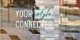

In [3]:
bounding_box = (900, 420, 940, 445)

little_sign=image.crop((400, 230, 480, 270))
display(little_sign)

In [4]:
new_size=(little_sign.width*10, little_sign.height*10)

help(little_sign.resize)

Help on method resize in module PIL.Image:

resize(size, resample=None, box=None, reducing_gap=None) method of PIL.Image.Image instance
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:data:`Resampling.NEAREST`, :py:data:`Resampling.BOX`,
       :py:data:`Resampling.BILINEAR`, :py:data:`Resampling.HAMMING`,
       :py:data:`Resampling.BICUBIC` or :py:data:`Resampling.LANCZOS`.
       If the image has mode "1" or "P", it is always set to
       :py:data:`Resampling.NEAREST`. If the image mode specifies a number
       of bits, such as "I;16", then the default filter is
       :py:data:`Resampling.NEAREST`. Otherwise, the default filter is
       :py:data:`Resampling.BICUBIC`. See: :ref:`concept-filters`.
    :param box: An optional 4-tuple of floats providing
       the source image region to be scaled.
       The values mu

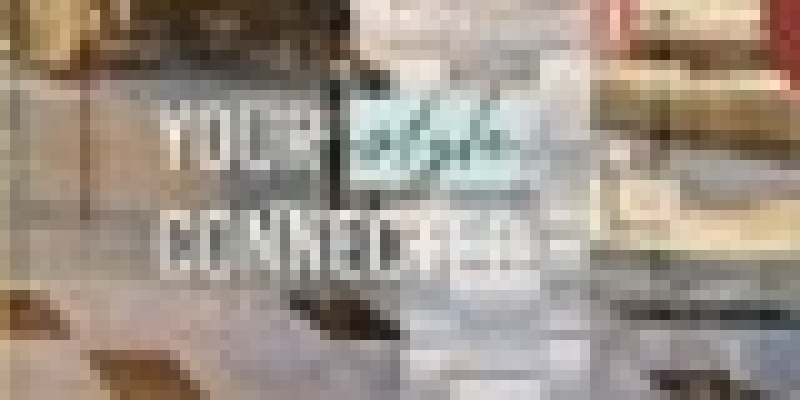

In [5]:
# There are a number of different filters for resizing the image.
# The default is Image.NEAREST. 
display(little_sign.resize( new_size, Image.NEAREST))

0


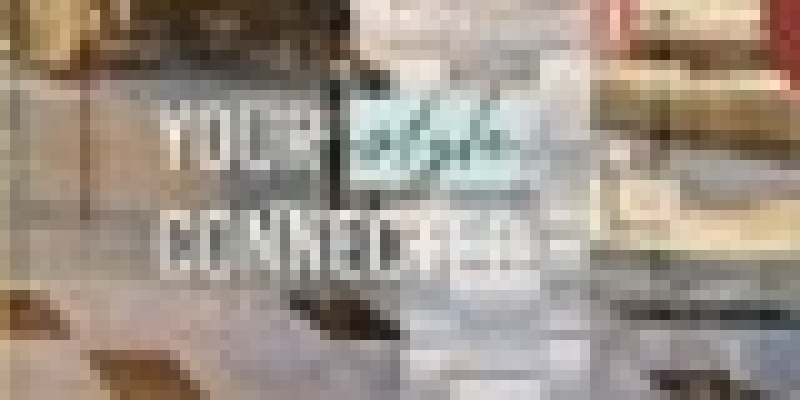

4


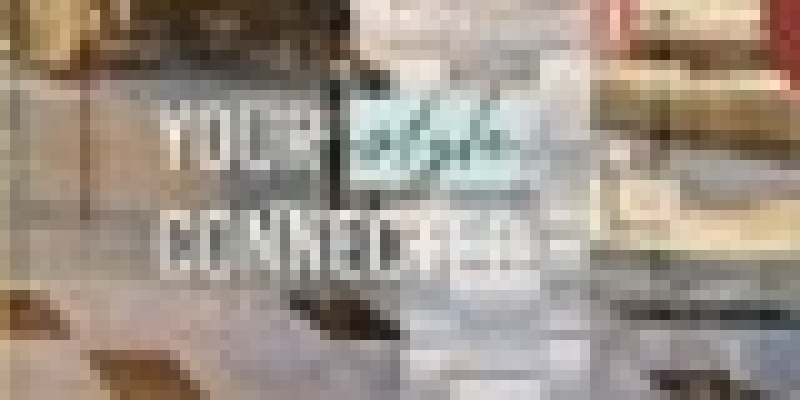

2


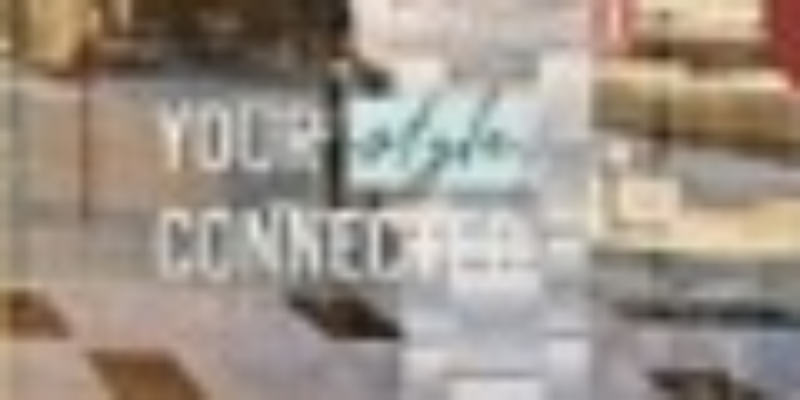

5


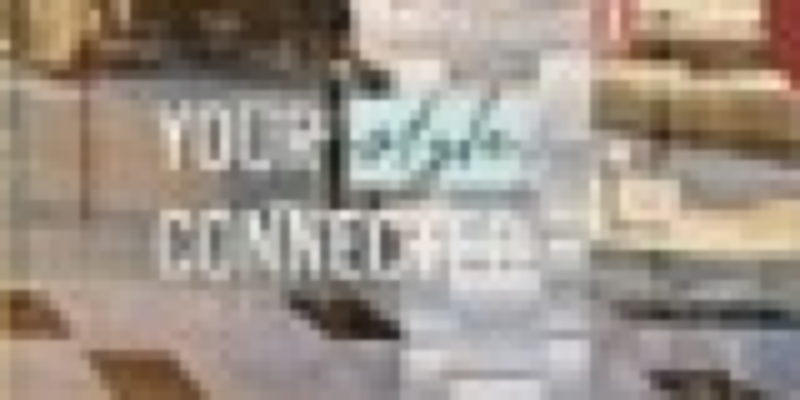

3


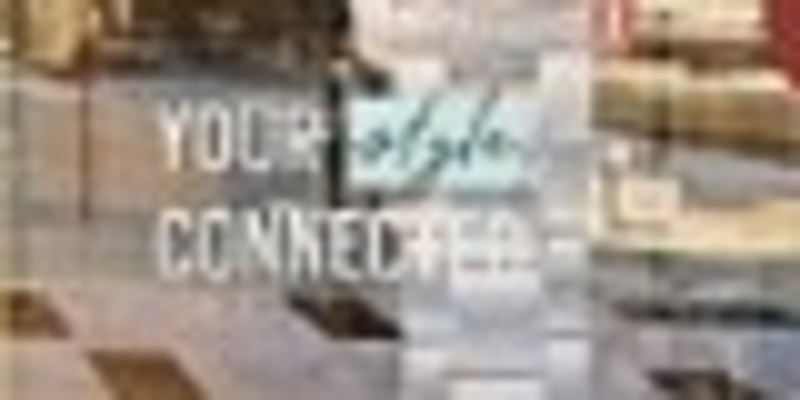

1


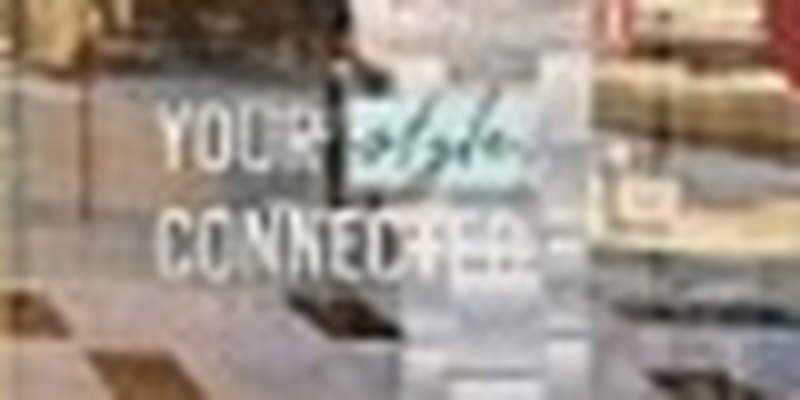

In [6]:
options=[Image.NEAREST, Image.BOX, Image.BILINEAR, Image.HAMMING, Image.BICUBIC, Image.LANCZOS]
for option in options:
    print(option)
    display(little_sign.resize( new_size, option))

In [7]:
# From this, we can notice two things. 
# First, when we print out one of the re-sampling values, it actually just print an integer. 
# The second thing is that there's a number of different algorithms for the image re-sampling. 
# In this case, the LANCZOS and image.BICUBIC filters do a good job. Everything else not so much.

# Resize to the larger size
bigger_sign=little_sign.resize(new_size, Image.BICUBIC)
pytesseract.image_to_string(bigger_sign)

''

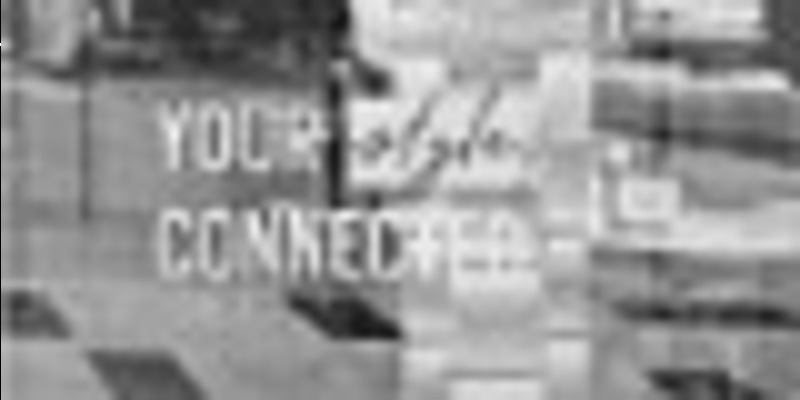

''

In [8]:
# let's try and binarize this. 
def binarize(image_to_transform, threshold):
    output_image=image_to_transform.convert("L")
    for x in range(output_image.width):
        for y in range(output_image.height):
            if output_image.getpixel((x,y))< threshold:
                output_image.putpixel( (x,y), 0 )
            else:
                output_image.putpixel( (x,y), 255 )
        return output_image
    
# Apply binarizations with threshold of 190, and try and display that as well as do the OCR work
binarized_bigger_sign=binarize(bigger_sign, 190)
display(binarized_bigger_sign)
pytesseract.image_to_string(binarized_bigger_sign)

In [9]:
# Load a list of english words into a list. 
eng_dict=[]
with open("words_alpha.txt", "r") as f:
    data=f.read()
    # Split this into a list based on the new line chracters
    eng_dict=data.split("\n")

# Iterate through all possible thresholds and look for an enlish word
for i in range(150, 170):
    strng=pytesseract.image_to_string(binarize(bigger_sign,i))
    # We want to remove non alphabetical characters, like ([%$]) from the text
    # Convert string to lower case only
    string=strng.lower()
    # Import string package
    import string
    # Iterate over string looking at it character by chracter, putting it in the comparison text
    comparison=''
    for character in strng:
        if character in string.ascii_lowercase:
            comparison=comparison+character
    # Search for comparison in the dictionary file
    if comparison in eng_dict:
        print(comparison)

In [10]:
# Sometimes you want to interact with a function you've created, and call it multiple times with different parameters. 
# For instance, if we wanted to draw a red box around a portion of an image to try and fine tune the crop location. 
# Widgets are one way to do this quickly in the browser, without having to learn how to write a whole large desktop application. 
from PIL import Image, ImageDraw
from ipywidgets import interact

# Use interact to annotate a function.
image=Image.open('storefront.jpg')

In [11]:
# at(@) sign will take a set of parameters which are identical to the function to be called. 
# Decorators, which again is the at sign is describing this, are standard Python statements. 
# And just a shorthand for functions which wrap other functions. 
# at(@) sign is our annotation, our decorator, and we're going to put in four values. So we'll give it the left and the top. 
# Set the defaults for these at 100. And the right and the bottom. And so this is where we actually want to draw our red box. 
@interact(left=100, top=100, right=200, bottom=200)

# def draw_border, again its got to take the exact same parameters as the decorator, so left, top, right, bottom. We'll make a copy of the image. 
def draw_border(left, top, right, bottom):
    img=image.copy()
    drawing_object=ImageDraw.Draw(img)
    drawing_object.rectangle((left, top, right, bottom), fill = None, outline='red')
    display(img)

interactive(children=(IntSlider(value=100, description='left', max=300, min=-100), IntSlider(value=100, descri…

> Resources:
 https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html